IMPORTS

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf

import yfinance as yf
yf.pdr_override()

In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install pandas_datareader


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


FUNCTION THAT SAVES STOCK DATA TO CSV

In [2]:
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    print('start: ', start)
    end = dt.datetime(eyear, emonth, eday)
    print('end: ', end)
    print('ticker: ', ticker)
    
    # Reads data into a dataframe
    df = web.get_data_yahoo(ticker, start, end)
    
    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    df.to_csv("/Users/m1852/python/Python For Finance Youtube/" + ticker + '.csv')
    return df

In [7]:
save_to_csv_from_yahoo('GOOG', 2020, 1, 1, 2021, 1, 1)

start:  2020-01-01 00:00:00
end:  2021-01-01 00:00:00
ticker:  GOOG
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000
2020-01-08,69.603996,70.579002,69.542000,70.216003,70.216003,30560000
...,...,...,...,...,...,...
2020-12-24,86.750000,87.300003,86.455498,86.942497,86.942497,6936000
2020-12-28,87.581749,89.536400,87.316750,88.804497,88.804497,27860000
2020-12-29,89.389503,89.622002,87.804497,87.935997,87.935997,25988000


FUNCTIONS THAT RETURNS A DATAFRAME FROM A CSV

In [13]:
def get_df_from_csv(ticker):
    try: 
        df = pd.read_csv("/Users/m1852/python/Python For Finance Youtube/stock/" + ticker + '.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else: 
        return df

FUNCTIONS THAT ADD DAILY RETURN TO DATAFRAME

In [95]:
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv("/Users/m1852/python/Python For Finance Youtube/" + ticker + '.csv')
    return df

In [105]:
start, end

(datetime.datetime(2010, 2, 27, 19, 14, 55, 347014),
 datetime.datetime(2023, 11, 6, 19, 14, 55, 347014))

RETURNS TOTAL RETURN OVER TIME

In [19]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    start = pd.to_datetime(start) # Not necessariy as Pandas convert the strings to datetime object automatically when executing the mask statement. 
    end = f"{eyear}-{emonth}-{eday}"
    end = pd.to_datetime(end)
    
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret = df.loc[mask]['daily_return'].mean()

    df2 = df.loc[mask]
    days = df2.shape[0]
    
    return (days * daily_ret)

MATPLOTLIB FINANCE

In [145]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try: 
        df = pd.read_csv("/Users/m1852/python/Python For Finance Youtube/" + ticker + '.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else: 
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df[start:end]
        mpf.plot(df_sub, type='candle')
        mpf.plot(df_sub, type='line')
        mpf.plot(df_sub, type='ohlc', mav = 4)

        s = mpf.make_mpf_style(base_mpf_style = 'charles', rc={'font.size': 8})
        fig = mpf.figure(figsize = (12, 8), style = s)
        ax = fig.add_subplot(2, 1, 2)
        av = fig.add_subplot(2, 1, 2, sharex = ax)
        mpf.plot(df_sub, type = chart_type, mav = (3, 5, 7), ax = ax, volume = av, show_nontrading = True)
        

SYMPLE PRICE PLOT

In [ ]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try: 
        df = pd.read_csv("/Users/m1852/python/Python For Finance Youtube/" + ticker + '.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else: 

DOWNLOAD MULTIPLE STOCKS

In [147]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args: 
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

In [156]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    for x in tickers: 
        mult_df[x] = web.get_data_yahoo(x, start, end)[col_name]
    return mult_df

In [158]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df/stock_df.iloc[0] * investment).plot(figsize = (15,6))

In [163]:
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [165]:
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print('stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}'.format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

TESTING FUNCTIONS:

In [168]:
save_to_csv_from_yahoo('AAPL', 2020, 1, 1, 2021, 1, 1)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249023,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536903,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114883,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941635,132079200
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.850601,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.494781,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.703995,121047300


In [103]:
AMZN = get_df_from_csv('AMZN')


In [102]:
add_daily_return_to_df(AMZN, 'AMZN')

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,NaN
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,-0.012139
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.014886
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.002092
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,-0.007809
...,...,...,...,...,...,...,...,...
248,2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,-0.003949
249,2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,0.035071
250,2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,0.011584
251,2020-12-30,167.050003,167.104996,164.123505,164.292496,164.292496,64186000,-0.010882


In [119]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    253 non-null    int64  
 1   Date          253 non-null    object 
 2   Open          253 non-null    float64
 3   High          253 non-null    float64
 4   Low           253 non-null    float64
 5   Close         253 non-null    float64
 6   Adj Close     253 non-null    float64
 7   Volume        253 non-null    int64  
 8   daily_return  252 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 17.9+ KB


In [136]:
get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)


0.6166402116980401

In [127]:
start = f"2020-1-1"
start

'2020-1-1'

In [128]:
start > '2019-12-1'

True

In [138]:
 df = pd.read_csv("/Users/m1852/python/Python For Finance Youtube/" + 'AMZN' + '.csv')
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,NaN
1,1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,-0.012139
2,2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.014886
3,3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.002092
4,4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,-0.007809
...,...,...,...,...,...,...,...,...,...
248,248,2020-12-24,159.695007,160.100006,158.449997,158.634506,158.634506,29038000,-0.003949
249,249,2020-12-28,159.699997,165.199997,158.634506,164.197998,164.197998,113736000,0.035071
250,250,2020-12-29,165.496994,167.532501,164.061005,166.100006,166.100006,97458000,0.011584
251,251,2020-12-30,167.050003,167.104996,164.123505,164.292496,164.292496,64186000,-0.010882


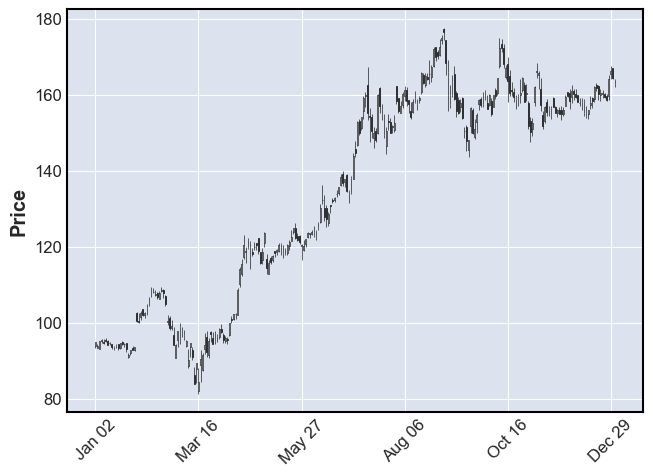

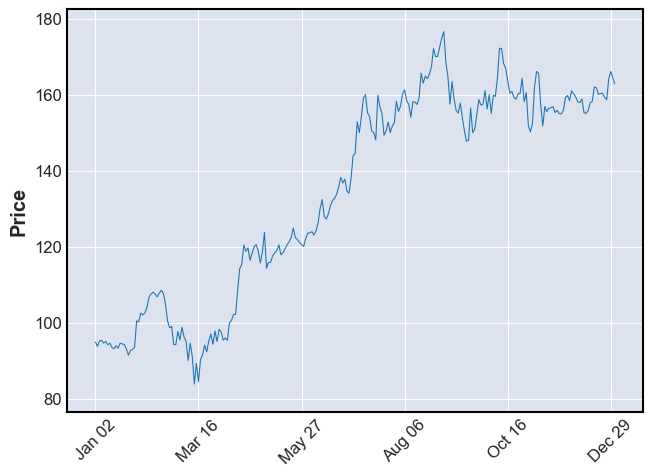

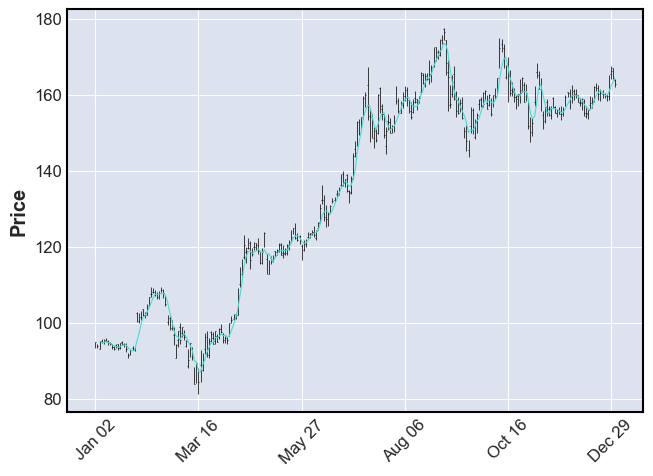

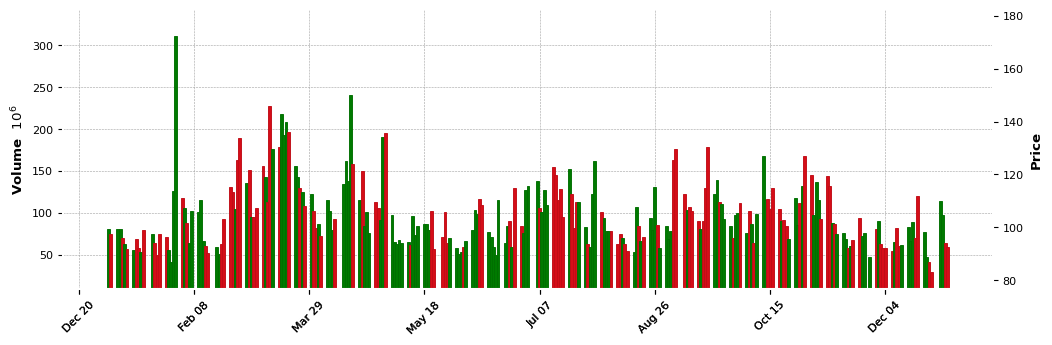

In [146]:
mplfinance_plot('AMZN', 'ohlc', 2020, 1, 1, 2021, 1, 1)

In [150]:
tickers = ['META','GOOG','AAPL','NFLX']
download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


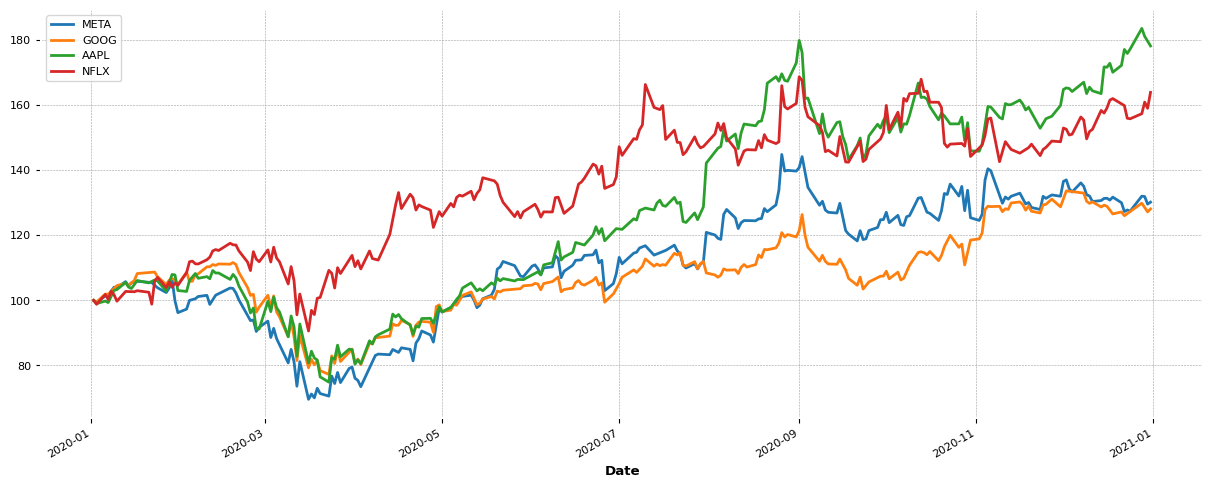

In [159]:
mult_df = merge_df_by_column_name('Adj Close', 2020, 1, 1, 2021, 1, 1, *tickers)
plot_return_mult_stocks(100, mult_df)

In [166]:
get_mult_stock_mean_sd(mult_df)
mult_df

stock: META Mean:  234.55 Standard deviation: 38.57
Coefficient of Variation: 0.1644238149761194

stock: GOOG Mean:   74.07 Standard deviation: 8.80
Coefficient of Variation: 0.11878452781797685

stock: AAPL Mean:   93.52 Standard deviation: 21.60
Coefficient of Variation: 0.23099015451407037

stock: NFLX Mean:  446.83 Standard deviation: 65.61
Coefficient of Variation: 0.14684116488739776



,META,GOOG,AAPL,NFLX
Date,,,,
2020-01-02,209.779999,68.368500,73.249039,329.809998
2020-01-03,208.669998,68.032997,72.536896,325.899994
2020-01-06,212.600006,69.710503,73.114883,335.829987
2020-01-07,213.059998,69.667000,72.771027,330.750000
2020-01-08,215.220001,70.216003,73.941643,339.260010
...,...,...,...,...
2020-12-24,267.399994,86.942497,129.850586,513.969971
2020-12-28,277.000000,88.804497,134.494766,519.119995
2020-12-29,276.779999,87.935997,132.703995,530.869995
